# k-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


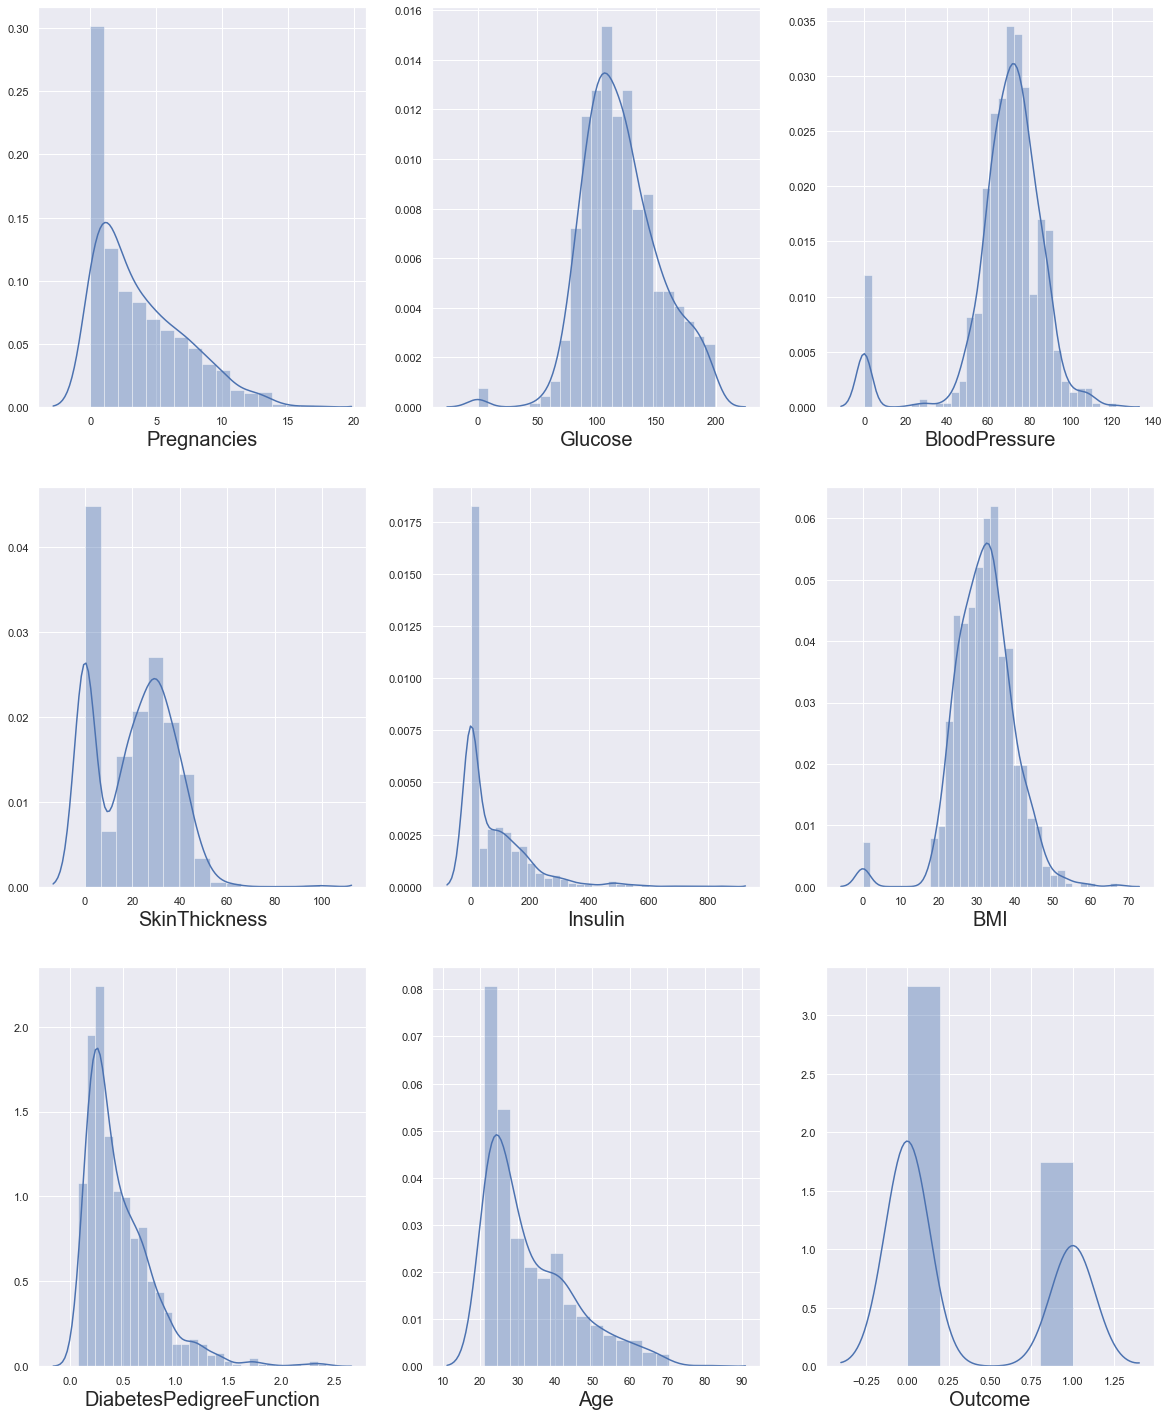

In [4]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [5]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

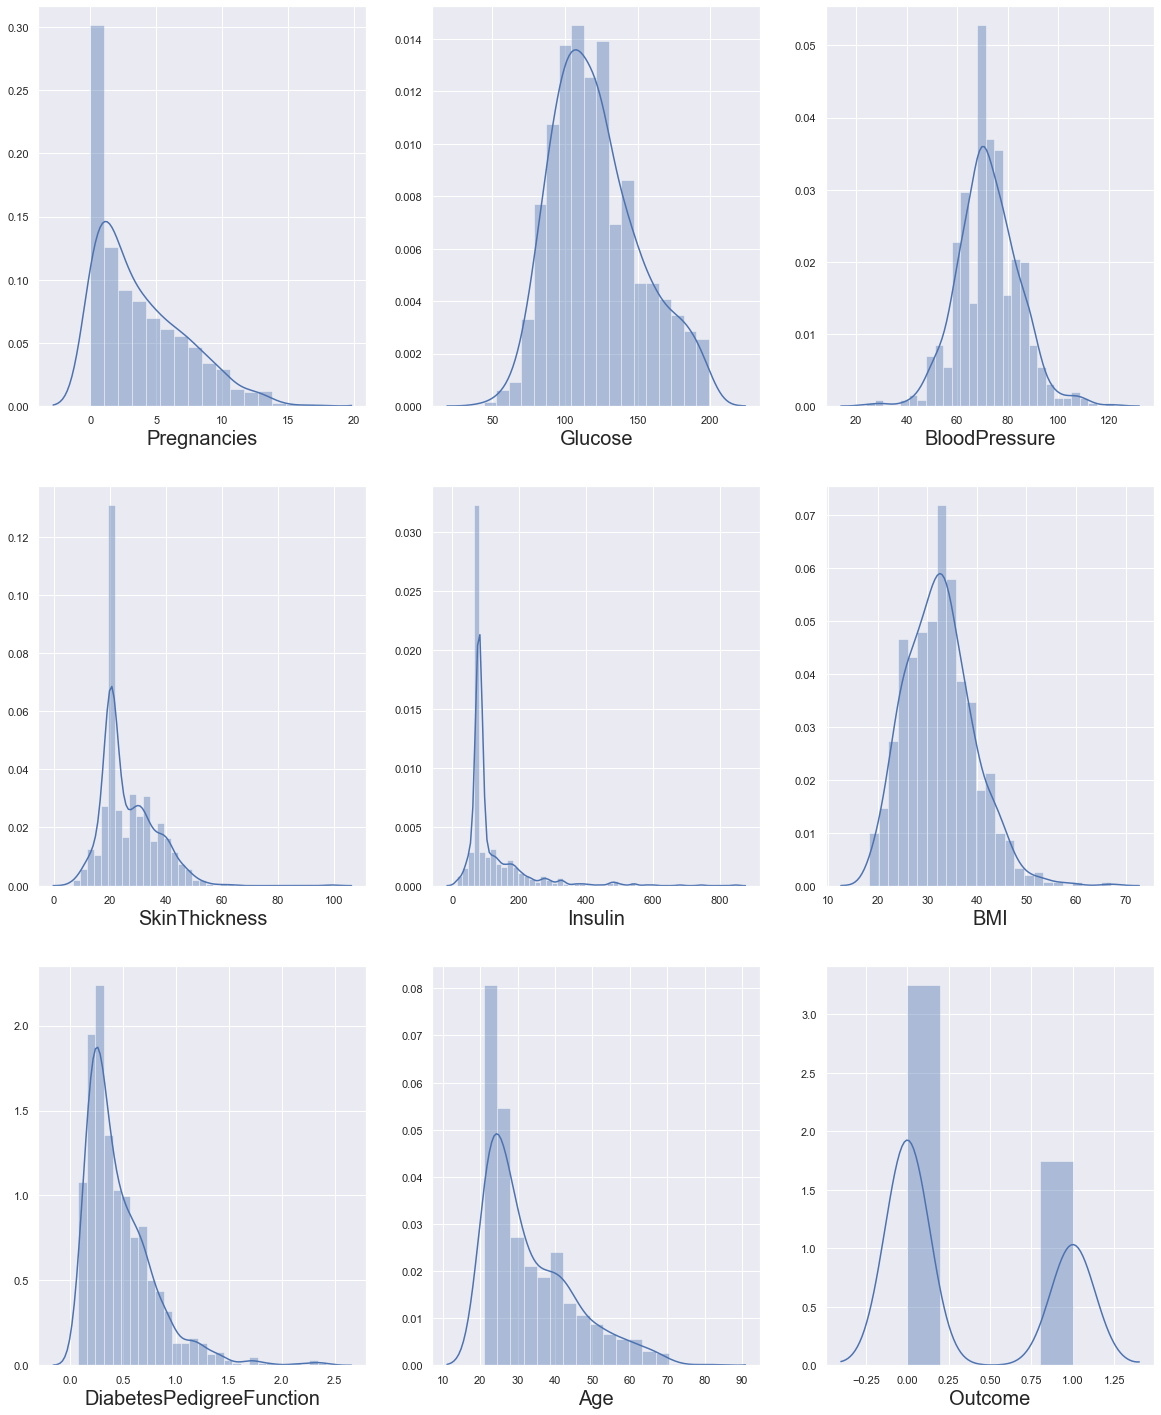

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

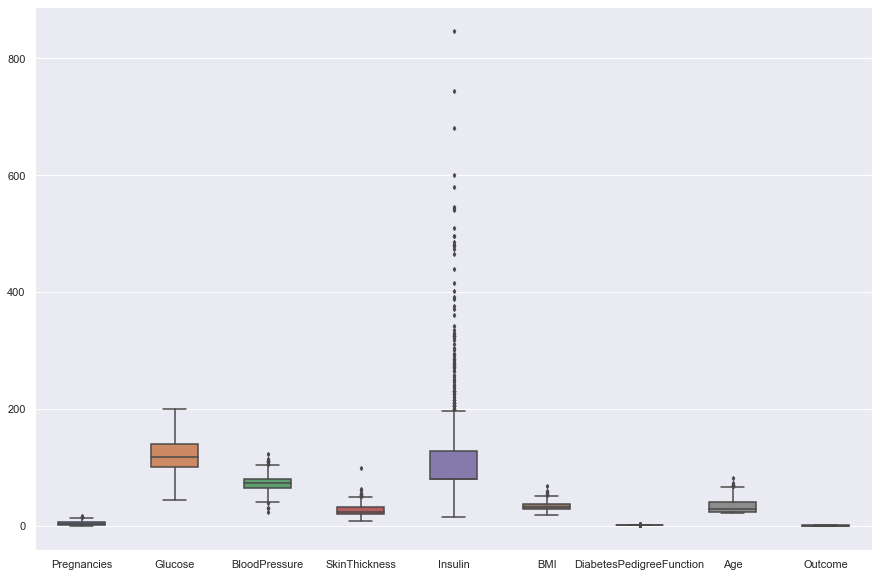

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [8]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

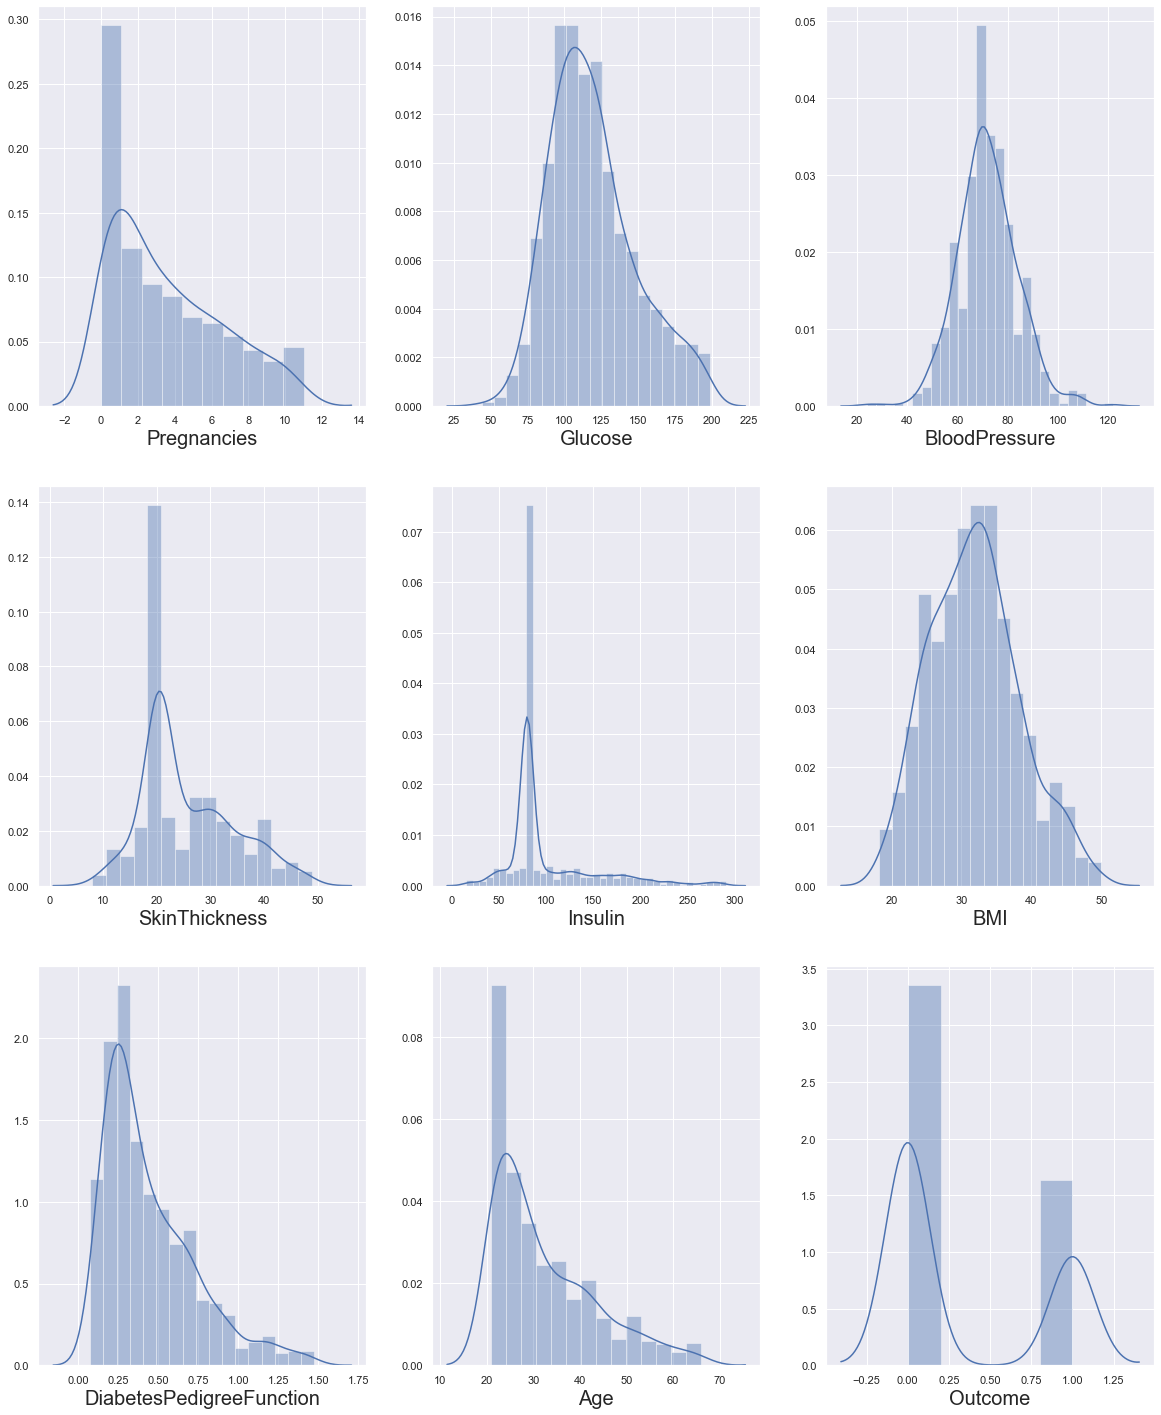

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [10]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

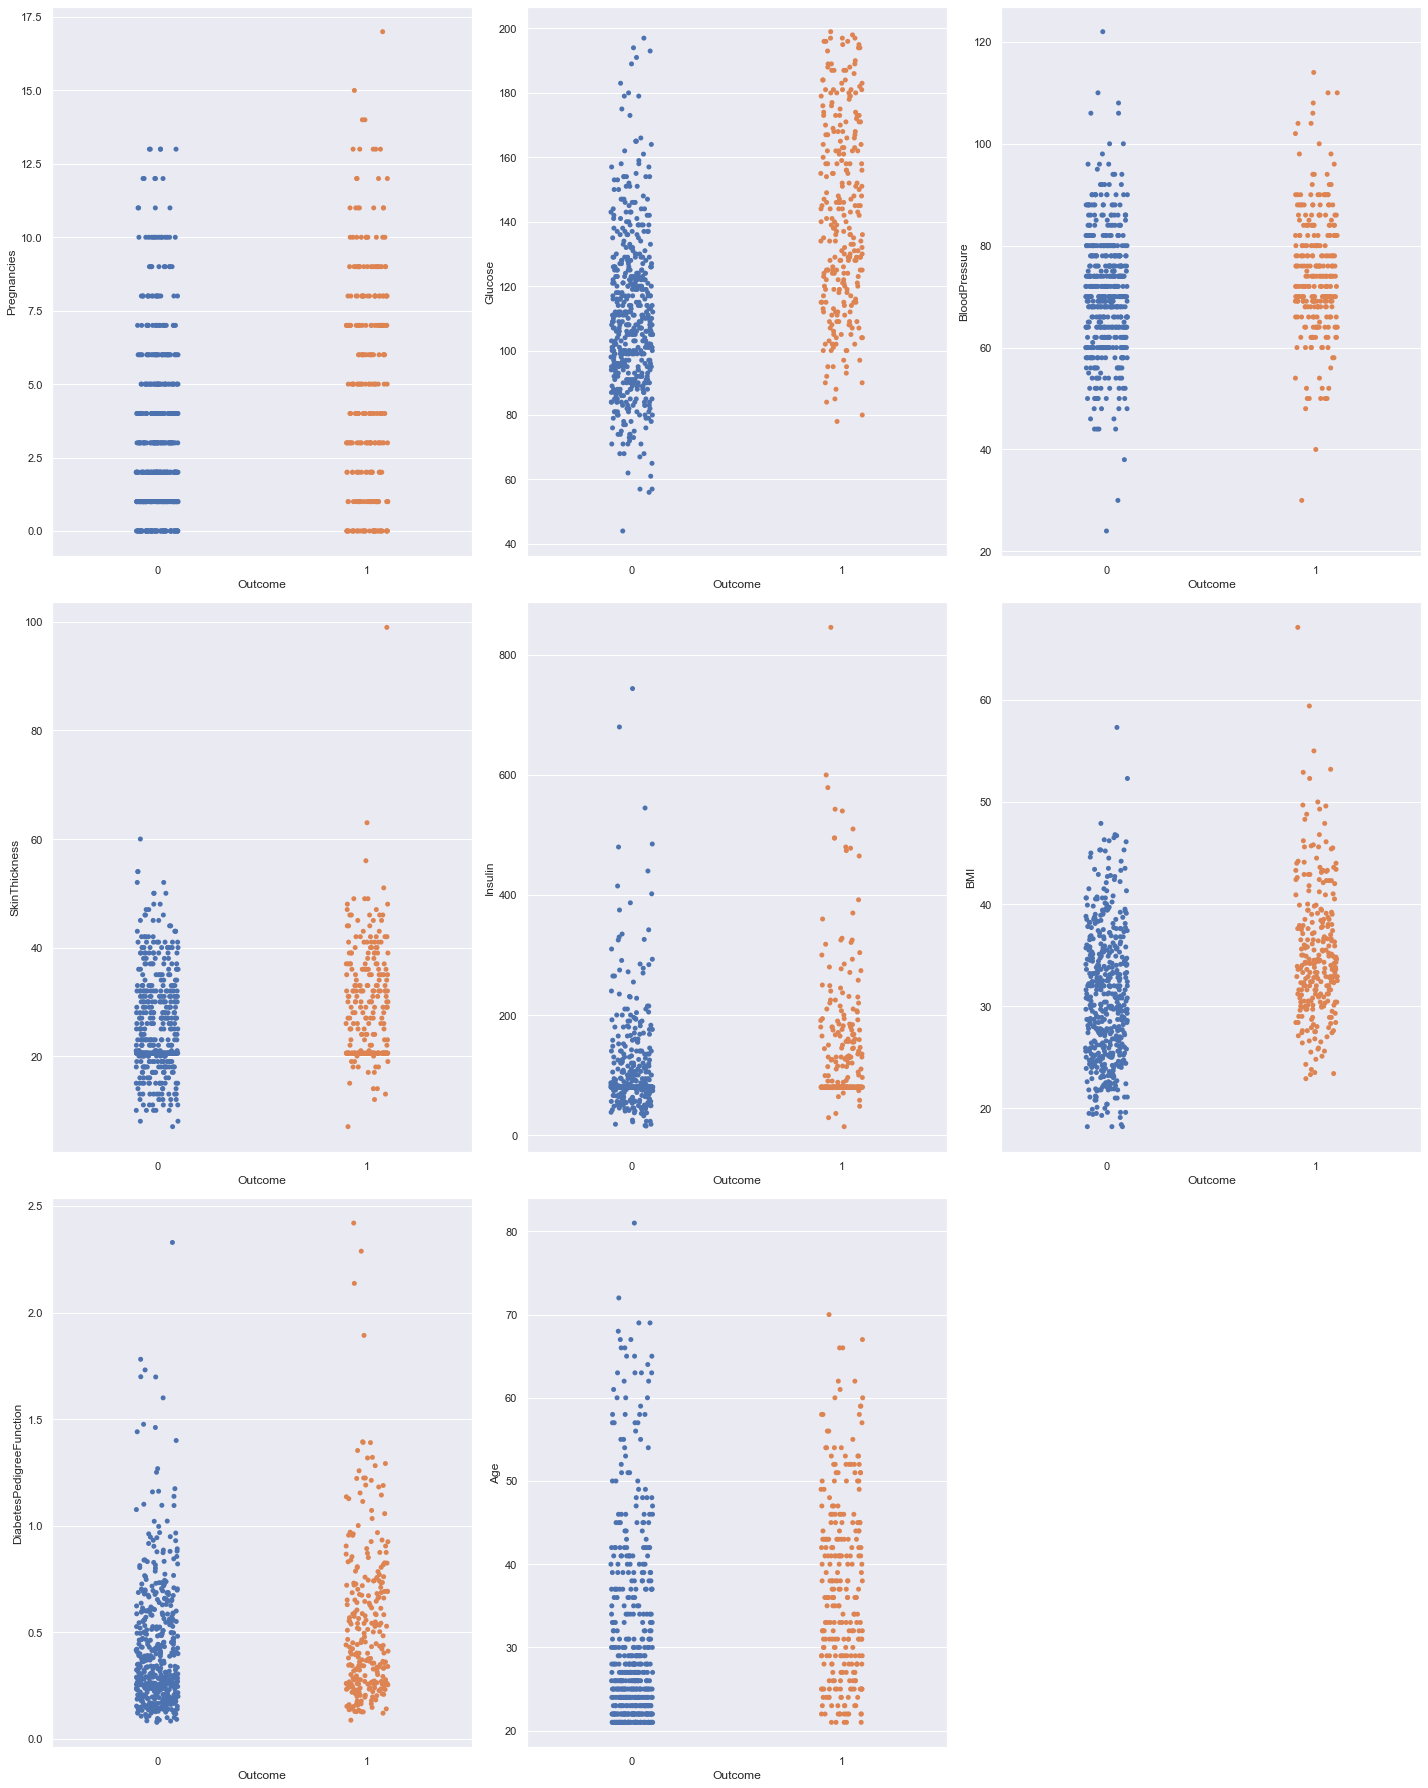

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [12]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [13]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [15]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(x_test)

In [17]:
knn.score(x_train,y_train)

0.828125

In [18]:
knn.score(x_test,y_test)

0.6822916666666666

In [19]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.6822916666666666


In [20]:
# Let's try to increase the accuracy by using hyperparameter tuning.

In [21]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [22]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [23]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.759, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.696, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.730, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.670, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.741, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.733, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.713, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.730, total= 

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.722, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.759, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.696, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.730, tota

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.713, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.730, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.724, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.713, tot

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.722, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.759, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.696, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.730, tota

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.724, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.713, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.713, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=11, score=0.741, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=11, score=0.774, 

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.696, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.730, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.670, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.741, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.722, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.704, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.724, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.713, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.713, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.741, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.774, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.670, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.741, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.722, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.704, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.730, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.739, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.750, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.739, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.713, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.722, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.759, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.748, total=   0.0s


[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.733, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.765, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.713, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.739, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.730, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.724, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.739, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.722, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.759, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.696, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.730, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.670, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.765, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.713, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.739, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.730, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.724, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=bru

[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.759, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.696, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.730, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.670, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.741, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.722, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.713, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.713, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.741, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.774, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.765, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.713, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.748, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   13.2s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [24]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [21]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [23]:
knn.score(x_train,y_train)

0.8055555555555556

In [24]:
knn.score(x_test,y_test)

0.7239583333333334

Let's now use k-fold cross validation and check how well our model is generalizing over our dataset: We are randomly selecting our k to be 12 for k fold.

In [25]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


12

In [26]:
count=0
for i,j in kfold.split(X_scaled):
    print(i)
    print(j)
    print(count)
    count=count+1
    print("*****")

[ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 31

In [28]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.8068181818181818 and test score is :   0.6875
for k =  2
train_score is :   0.7926136363636364 and test score is :   0.765625
for k =  3
train_score is :   0.7954545454545454 and test score is :   0.78125
for k =  4
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  5
train_score is :   0.7940340909090909 and test score is :   0.65625
for k =  6
train_score is :   0.7954545454545454 and test score is :   0.765625
for k =  7
train_score is :   0.7997159090909091 and test score is :   0.703125
for k =  8
train_score is :   0.7926136363636364 and test score is :   0.734375
for k =  9
train_score is :   0.7840909090909091 and test score is :   0.890625
for k =  10
train_score is :   0.7997159090909091 and test score is :   0.796875
for k =  11
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  12
train_score is :   0.7911931818181818 and test score is :   0.8125
*******************************************

([<matplotlib.axis.YTick at 0x1dd96411f70>,
 <a list of 7 Text major ticklabel objects>)

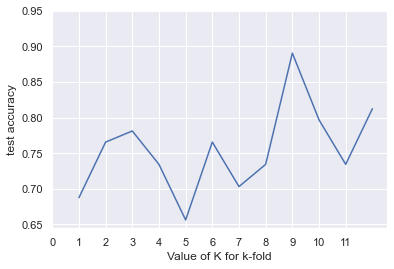

In [33]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

Average train score is :   0.7959280303030303


Average test score is :   0.7552083333333334

Our cross validation tells that on an avergae our model has a 75% accuracy on our test data.
so, that's how we can use cross validation to compute how well our model is generalizing on our data.

We can also use cross valdition score to opt between different models or to do hyperparameter tuning.

In [36]:
# let's save the model
import pickle

with open('/modelForPrediction.sav', 'wb') as f:
    pickle.dump(knn,f)
    
with open('/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)